In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
#helpful link to refer to
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [3]:
combined_df = pd.read_csv('crime_politics.csv')
combined_df

,Unnamed: 0,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,...,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,111023,2020,WY,West,5,2020-11-29,6,White,2,Intimidation,...,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219573,111024,2020,WY,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,...,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219574,111025,2020,WY,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219575,111026,2020,WY,West,5,2020-01-30,1,White,1,Simple Assault,...,Anti-Female,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [4]:
combined_df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'REGION_NAME',
       'POPULATION_GROUP_CODE', 'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT',
       'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME',
       'BIAS_DESC', 'VICTIM_TYPES', 'CONGRESS', 'YEAR_START', 'YEAR_END',
       'HOUSE_MAJORITY', 'SENATE_MAJORITY', 'PRESIDENCY', 'PRESIDENT',
       'PARTY_GOVERNMENT'],
      dtype='object')

In [5]:
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
combined_df.head(10)

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
5,1991,AR,South,3,1991-07-27,1,Black or African American,1,Robbery,Grocery/Supermarket,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
6,1991,AR,South,2,1991-11-14,2,Black or African American,1,Aggravated Assault,School-College/University,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
7,1991,AR,South,3,1991-07-10,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,Residence/Home,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
8,1991,AR,South,3,1991-10-06,2,Black or African American,1,Intimidation,Residence/Home,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
9,1991,AR,South,3,1991-10-04,10,Black or African American,2,Robbery,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided


In [7]:
combined_df.describe()

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,CONGRESS,YEAR_START,YEAR_END
count,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2005.472691,0.955724,1.247567,108.983523,2004.967046,2006.967046
std,8.591466,1.358364,2.274116,4.284975,8.569949,8.569949
min,1991.000000,0.000000,1.000000,102.000000,1991.000000,1993.000000
25%,1998.000000,0.000000,1.000000,105.000000,1997.000000,1999.000000
50%,2005.000000,1.000000,1.000000,109.000000,2005.000000,2007.000000
75%,2013.000000,1.000000,1.000000,113.000000,2013.000000,2015.000000
max,2020.000000,99.000000,900.000000,116.000000,2019.000000,2021.000000


In [8]:
combined_df.values

array([[1991, 'AR', 'South', ..., 'Republican', 'G.H.W Bush', 'Divided '],
       [1991, 'AR', 'South', ..., 'Republican', 'G.H.W Bush', 'Divided '],
       [1991, 'AR', 'South', ..., 'Republican', 'G.H.W Bush', 'Divided '],
       ...,
       [2020, 'WY', 'West', ..., 'Republican', 'Trump', 'Divided'],
       [2020, 'WY', 'West', ..., 'Republican', 'Trump', 'Divided'],
       [2020, 'WY', 'West', ..., 'Republican', 'Trump', 'Divided']],
      dtype=object)

In [9]:
combined_df.dtypes

DATA_YEAR                 int64
STATE_ABBR               object
REGION_NAME              object
POPULATION_GROUP_CODE    object
INCIDENT_DATE            object
TOTAL_OFFENDER_COUNT      int64
OFFENDER_RACE            object
VICTIM_COUNT              int64
OFFENSE_NAME             object
LOCATION_NAME            object
BIAS_DESC                object
VICTIM_TYPES             object
CONGRESS                  int64
YEAR_START                int64
YEAR_END                  int64
HOUSE_MAJORITY           object
SENATE_MAJORITY          object
PRESIDENCY               object
PRESIDENT                object
PARTY_GOVERNMENT         object
dtype: object

## Encode Categorical Data

In [10]:
objects = combined_df.select_dtypes(['object']).columns
objects

Index(['STATE_ABBR', 'REGION_NAME', 'POPULATION_GROUP_CODE', 'INCIDENT_DATE',
       'OFFENDER_RACE', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC',
       'VICTIM_TYPES', 'HOUSE_MAJORITY', 'SENATE_MAJORITY', 'PRESIDENCY',
       'PRESIDENT', 'PARTY_GOVERNMENT'],
      dtype='object')

In [14]:
for col in combined_df:
    if (combined_df[col].dtypes) == object and col1 != combined_df['STATE_ABBR'] or col1 != combined_df['REGION_NAME']:
        combined_df[col] = combined_df[col].astype('category')
        combined_df[col] = combined_df[col].cat.codes 

In [15]:
combined_df.dtypes

DATA_YEAR                int64
STATE_ABBR                int8
REGION_NAME               int8
POPULATION_GROUP_CODE     int8
INCIDENT_DATE            int16
TOTAL_OFFENDER_COUNT     int64
OFFENDER_RACE             int8
VICTIM_COUNT             int64
OFFENSE_NAME             int16
LOCATION_NAME             int8
BIAS_DESC                 int8
VICTIM_TYPES              int8
CONGRESS                 int64
YEAR_START               int64
YEAR_END                 int64
HOUSE_MAJORITY            int8
SENATE_MAJORITY           int8
PRESIDENCY                int8
PRESIDENT                 int8
PARTY_GOVERNMENT          int8
dtype: object

In [15]:
combined_df

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,1991,2,3,7,242,1,6,1,266,24,4,3,102,1991,1993,0,0,1,1,1
1,1991,2,3,8,261,1,2,1,336,24,33,3,102,1991,1993,0,0,1,1,1
2,1991,2,3,5,184,1,2,1,0,35,4,3,102,1991,1993,0,0,1,1,1
3,1991,2,3,5,357,1,2,2,21,24,33,3,102,1991,1993,0,0,1,1,1
4,1991,2,3,5,356,1,2,1,0,40,33,3,102,1991,1993,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,2020,52,5,7,10925,6,6,2,266,32,17,3,116,2019,2021,0,2,1,4,0
219573,2020,52,5,7,10787,0,5,1,181,32,33,2,116,2019,2021,0,2,1,4,0
219574,2020,52,5,7,10881,1,2,1,0,35,33,3,116,2019,2021,0,2,1,4,0
219575,2020,52,5,7,10621,1,6,1,336,35,8,3,116,2019,2021,0,2,1,4,0


In [20]:
X = combined_df.drop(['STATE_ABBR'], axis=1)

KeyError: "['STATE_ABBR'] not found in axis"

In [16]:
backup_x_columns = X

In [17]:
print(X)

None


## Normalize

In [21]:
#Normalize data
norm = Normalizer()

In [22]:
#fit normalizer to data
X_norm = norm.fit_transform(X)

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
combined_df['BIAS_DESC'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry', 'Anti-Multiple Religions',
       'Anti-Multiple Races, Group', 'Anti-Lesbian (Female)',
       'Anti-Native American', 'Anti-Atheism/Agnosticism',
       'Anti-Bisexual', 'Anti-Physical Disability',
       'Anti-Mental Disability', 'Anti-Transgender',
       'Anti-Gender Non-Conforming',
       'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Female',
       'Anti-Male', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Buddhist', 'Anti-Sikh', 'Anti-Other Christian', 'Anti-Hindu',
       'Anti-Eastern Orthodox (Russian, Greek, Other)',
       'Anti-Other Race/Ethnicity/Ancestry;Anti-Sikh',
       "Unknown (offender's motivation not known)"], dtype=object)

In [9]:
total_count = combined_df['BIAS_DESC'].value_counts()
print(total_count)

Anti-Black or African American                    75266
Anti-Jewish                                       28169
Anti-White                                        25205
Anti-Gay (Male)                                   21945
Anti-Hispanic or Latino                           14073
Anti-Lesbian (Female)                             11276
Anti-Other Race/Ethnicity/Ancestry                10772
Anti-Asian                                         6445
Anti-Multiple Races, Group                         5256
Anti-Islamic (Muslim)                              3973
Anti-Other Religion                                3536
Anti-Native American                               2385
Anti-Catholic                                      1628
Anti-Arab                                          1269
Anti-Protestant                                    1264
Anti-Multiple Religions                            1197
Anti-Mental Disability                             1193
Anti-Transgender                                

In [11]:
#counts of bias description after grouping by state
combined_df['BIAS_TOTAL'] = total_count

In [14]:
bias_all_years.columns

Index(['BIAS_DESC'], dtype='object')

In [13]:
#sort bias count in descending order
bias_all_years = bias_all_years.sort_values(['BIAS_DESC'], ascending=False)

ValueError: 'BIAS_DESC' is both an index level and a column label, which is ambiguous.

In [25]:
#groupby state and bias description
grouped_states = combined_df.groupby(['STATE_ABBR', 'BIAS_DESC'])

In [34]:
#total bias count for each state
bias_states = grouped_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)

In [35]:
#convert to dataframe
bias_states = pd.DataFrame(bias_states)
bias_states

TOTAL_OFFENDER_COUNT
STATE_ABBR BIAS_DESC                                           
CA         Anti-Black or African American                 13253
           Anti-Gay (Male)                                 7043
           Anti-Hispanic or Latino                         4825
MI         Anti-Black or African American                  4713
NJ         Anti-Black or African American                  4317
...                                                         ...
MS         Anti-Other Christian                               0
           Anti-Islamic (Muslim)                              0
FS         Anti-Bisexual                                      0
VT         Anti-Sikh                                          0
AK         Anti-Arab                                          0

[1379 rows x 1 columns]

In [38]:
#group incidents by year
#total number of incidents per year
#total number offenders and victims
#most common offense
#most common bias
#most common victim type
#presidency

year_sums = combined_df.groupby(['DATA_YEAR']).sum().reset_index()
grouped_year = year_sums.drop(['CONGRESS', 'YEAR_START', 'YEAR_END'], axis=1)
grouped_year

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT
0,1991,5343,5793
1,1992,7963,8461
2,1993,8648,9400
3,1994,6292,7528
4,1995,8437,10471
5,1996,8948,11072
6,1997,8558,10325
7,1998,7641,9941
8,1999,7356,9893
9,2000,7699,10128


In [ ]:
##Encode
for col in combined_df:
    col1 = 

#list of states
state_list = combined_df['STATE_ABBR'].tolist

## Subset data

In [9]:
subset_df = combined_df.sample(n=2000, random_state=24)
subset_df

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
36358,2001,AZ,West,1C,2001-05-18,1,White,5,Simple Assault,Residence/Home,Anti-Gay (Male),Individual,107,2001,2003,Republicans,Republicans / Democrats12,Republican,G.W. Bush,Unified / Divided
166157,2006,NJ,Northeast,3,2006-07-15,0,Unknown,1,Destruction/Damage/Vandalism of Property,Government/Public Building,Anti-Black or African American,Government,109,2005,2007,Republicans,Republicans,Republican,G.W. Bush,Unified
94138,2017,CA,West,1A,2017-10-14,6,White,2,Aggravated Assault,Residence/Home,Anti-Lesbian (Female),Individual,115,2017,2019,Republicans,Republicans,Republican,Trump,Unified
104067,2019,MI,Midwest,1B,2019-07-26,1,White,1,Intimidation,Residence/Home,Anti-Black or African American,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219484,2020,WV,South,8C,2020-12-28,0,Unknown,1,Aggravated Assault,Residence/Home,Anti-Physical Disability,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22702,1997,FL,South,9A,1997-10-13,1,Unknown,1,Destruction/Damage/Vandalism of Property,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Other,105,1997,1999,Republicans,Republicans,Democrat,Clinton,Divided
194521,2014,OH,Midwest,1B,2014-03-04,1,White,1,Intimidation,Grocery/Supermarket,Anti-Islamic (Muslim),Individual,113,2013,2015,Republicans,Democrats,Democrat,Obama,Divided
160734,2004,VA,South,9A,2004-08-13,0,Unknown,1,Intimidation,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,108,2003,2005,Republicans,Republicans,Republican,G.W. Bush,Unified
148074,2002,CO,West,1B,2002-02-10,1,White,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,107,2001,2003,Republicans,Republicans / Democrats12,Republican,G.W. Bush,Unified / Divided


In [10]:
group_states = subset_df.groupby(['STATE_ABBR'])
bias_offender = group_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)
#bias_offender = group_states['BIAS_DESC'].count()

In [11]:
#convert to dataframe
bias_offender = pd.DataFrame(bias_offender)
bias_offender

,TOTAL_OFFENDER_COUNT
STATE_ABBR,
CA,336
NY,134
MI,106
NJ,94
TX,89
MA,88
OH,81
MD,68
WA,66


In [13]:
total_count = subset_df['BIAS_DESC'].value_counts()
total_count

Anti-Black or African American                    681
Anti-Jewish                                       262
Anti-White                                        234
Anti-Gay (Male)                                   178
Anti-Hispanic or Latino                           115
Anti-Other Race/Ethnicity/Ancestry                112
Anti-Lesbian (Female)                             109
Anti-Asian                                         73
Anti-Multiple Races, Group                         51
Anti-Islamic (Muslim)                              34
Anti-Other Religion                                29
Anti-Native American                               22
Anti-Multiple Religions                            15
Anti-Mental Disability                             12
Anti-Arab                                          10
Anti-Physical Disability                            9
Anti-Catholic                                       9
Anti-Transgender                                    8
Anti-Protestant             

In [22]:
state_crime = subset_df.groupby('STATE_ABBR').agg({
                                            'TOTAL_OFFENDER_COUNT': 'sum',
                                            'DATA_YEAR': 'min'}, inplace = True)
state_crime

,TOTAL_OFFENDER_COUNT,DATA_YEAR
STATE_ABBR,,
AK,1,2013
AL,2,2011
AR,9,1992
AZ,51,1991
CA,336,1993
CO,32,1991
CT,25,1992
DC,14,2005
DE,5,1993


In [23]:
state_crime.columns

Index(['TOTAL_OFFENDER_COUNT', 'DATA_YEAR'], dtype='object')

## Encode categorical data


In [10]:
for col in combined_df:
    if (combined_df[col].dtypes) == object:
        print(col, combined_df[col].dtypes)

REGION_NAME object
POPULATION_GROUP_CODE object
INCIDENT_DATE object
OFFENDER_RACE object
OFFENSE_NAME object
LOCATION_NAME object
BIAS_DESC object
VICTIM_TYPES object
HOUSE_MAJORITY object
SENATE_MAJORITY object
PRESIDENCY object
PRESIDENT object
PARTY_GOVERNMENT object


In [11]:
for col in combined_df:
    if (combined_df[col].dtypes) == object:
        combined_df[col] = combined_df[col].astype('category')
        combined_df[col] = combined_df[col].cat.codes 

In [12]:
combined_df.dtypes

DATA_YEAR                int64
REGION_NAME               int8
POPULATION_GROUP_CODE     int8
INCIDENT_DATE            int16
TOTAL_OFFENDER_COUNT     int64
OFFENDER_RACE             int8
VICTIM_COUNT             int64
OFFENSE_NAME             int16
LOCATION_NAME             int8
BIAS_DESC                 int8
VICTIM_TYPES              int8
CONGRESS                 int64
YEAR_START               int64
YEAR_END                 int64
HOUSE_MAJORITY            int8
SENATE_MAJORITY           int8
PRESIDENCY                int8
PRESIDENT                 int8
PARTY_GOVERNMENT          int8
dtype: object

## Normalizing

In [13]:
combined_df.describe()

,DATA_YEAR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
count,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2005.472691,2.443562,6.152047,5469.121443,0.955724,4.906702,1.247567,219.571790,29.031397,13.416551,3.162271,108.983523,2004.967046,2006.967046,0.672466,1.436876,0.488093,1.904776,1.400292
std,8.591466,1.958412,4.444662,3141.739711,1.358364,1.374180,2.274116,99.206725,8.931027,10.147162,1.213311,4.284975,8.569949,8.569949,0.469315,0.986412,0.499859,1.415292,0.750036
min,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1991.000000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,1.000000,3.000000,2793.000000,0.000000,5.000000,1.000000,181.000000,24.000000,4.000000,3.000000,105.000000,1997.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2005.000000,3.000000,5.000000,5287.000000,1.000000,5.000000,1.000000,266.000000,32.000000,13.000000,3.000000,109.000000,2005.000000,2007.000000,1.000000,2.000000,0.000000,2.000000,1.000000
75%,2013.000000,5.000000,8.000000,8142.000000,1.000000,6.000000,1.000000,266.000000,35.000000,17.000000,3.000000,113.000000,2013.000000,2015.000000,1.000000,2.000000,1.000000,3.000000,2.000000
max,2020.000000,5.000000,19.000000,10957.000000,99.000000,6.000000,900.000000,352.000000,44.000000,34.000000,8.000000,116.000000,2019.000000,2021.000000,1.000000,3.000000,1.000000,4.000000,3.000000


In [14]:
#back up df before normalizing
combined_backup = combined_df

In [17]:
normalize = Normalizer()
X_norm = normalize.fit_transform(combined_df)

#turn output array into a df
norm_combined_df = pd.DataFrame(X_norm, columns = combined_backup.columns)

In [18]:
norm_combined_df

,DATA_YEAR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,0.573782,0.000865,0.002017,0.069741,0.000288,0.001729,0.000288,0.076658,0.006917,0.001153,0.000865,0.029395,0.573782,0.574358,0.0,0.000000,0.000288,0.000288,0.000288
1,0.572529,0.000863,0.002300,0.075053,0.000288,0.000575,0.000288,0.096620,0.006901,0.009489,0.000863,0.029331,0.572529,0.573104,0.0,0.000000,0.000288,0.000288,0.000288
2,0.576055,0.000868,0.001447,0.053237,0.000289,0.000579,0.000289,0.000000,0.010127,0.001157,0.000868,0.029512,0.576055,0.576634,0.0,0.000000,0.000289,0.000289,0.000289
3,0.573791,0.000865,0.001441,0.102885,0.000288,0.000576,0.000576,0.006052,0.006917,0.009510,0.000865,0.029396,0.573791,0.574368,0.0,0.000000,0.000288,0.000288,0.000288
4,0.573794,0.000865,0.001441,0.102597,0.000288,0.000576,0.000288,0.000000,0.011528,0.009510,0.000865,0.029396,0.573794,0.574371,0.0,0.000000,0.000288,0.000288,0.000288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,0.176030,0.000436,0.000610,0.952045,0.000523,0.000523,0.000174,0.023180,0.002789,0.001481,0.000261,0.010109,0.175943,0.176117,0.0,0.000174,0.000087,0.000349,0.000000
219573,0.178094,0.000441,0.000617,0.951037,0.000000,0.000441,0.000088,0.015958,0.002821,0.002909,0.000176,0.010227,0.178005,0.178182,0.0,0.000176,0.000088,0.000353,0.000000
219574,0.176722,0.000437,0.000612,0.951938,0.000087,0.000175,0.000087,0.000000,0.003062,0.002887,0.000262,0.010148,0.176635,0.176810,0.0,0.000175,0.000087,0.000350,0.000000
219575,0.180548,0.000447,0.000626,0.949308,0.000089,0.000536,0.000089,0.030032,0.003128,0.000715,0.000268,0.010368,0.180459,0.180638,0.0,0.000179,0.000089,0.000358,0.000000


## Perform k-means clustering

In [22]:
inertias = []

for k in range(1,11):
    #build and fit the model
    model = KMeans(n_clusters=k)
    #model.fit(X)
    model.fit(X_norm)
    inertia = model.inertia_
    inertias.append(inertia)

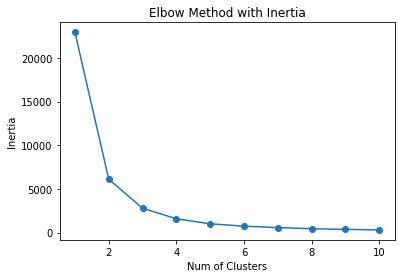

In [27]:
#plot inertia with k values
plt.plot(range(1,11), inertias, '-o')
plt.xlabel('Num of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertia')
plt.show()

The optimized number of clusters is 3

In [28]:
model = KMeans(n_clusters = 3)
model.fit(X_norm)
clusters = model.predict(X_norm)

In [33]:
#add clusters to df and rename
combined_clusters = pd.DataFrame(X_norm, columns = combined_backup.columns, index = combined_backup.index)
combined_clusters['clusters'] = clusters
combined_clusters.head()

,DATA_YEAR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT,clusters
STATE_ABBR,,,,,,,,,,,,,,,,,,,,
AR,0.573782,0.000865,0.002017,0.069741,0.000288,0.001729,0.000288,0.076658,0.006917,0.001153,0.000865,0.029395,0.573782,0.574358,0.0,0.0,0.000288,0.000288,0.000288,0
AR,0.572529,0.000863,0.002300,0.075053,0.000288,0.000575,0.000288,0.096620,0.006901,0.009489,0.000863,0.029331,0.572529,0.573104,0.0,0.0,0.000288,0.000288,0.000288,0
AR,0.576055,0.000868,0.001447,0.053237,0.000289,0.000579,0.000289,0.000000,0.010127,0.001157,0.000868,0.029512,0.576055,0.576634,0.0,0.0,0.000289,0.000289,0.000289,0
AR,0.573791,0.000865,0.001441,0.102885,0.000288,0.000576,0.000576,0.006052,0.006917,0.009510,0.000865,0.029396,0.573791,0.574368,0.0,0.0,0.000288,0.000288,0.000288,0
AR,0.573794,0.000865,0.001441,0.102597,0.000288,0.000576,0.000288,0.000000,0.011528,0.009510,0.000865,0.029396,0.573794,0.574371,0.0,0.0,0.000288,0.000288,0.000288,0


## Analyzing results using PCA

In [35]:
from sklearn.decomposition import PCA

#create a PCA model to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X_norm)

PCA(n_components=2)

In [36]:
#transform the scaled data to a new PCA space
X_reduced = pca.transform(X_norm)

In [37]:
#confirm the new vector space and clusters
#convert to a df

X_reduced_df = pd.DataFrame(X_reduced, index=combined_backup.index, columns=['PC1','PC2'])
X_reduced_df['clusters'] = clusters
X_reduced_df.head()

,PC1,PC2,clusters
STATE_ABBR,,,
AR,0.764687,0.154967,0
AR,0.760174,0.151883,0
AR,0.776284,0.167341,0
AR,0.737376,0.136265,0
AR,0.737363,0.136749,0


In [39]:
#apply the same PCA transformation to the centroids

centres_reduced = pca.transform(model.cluster_centers_)

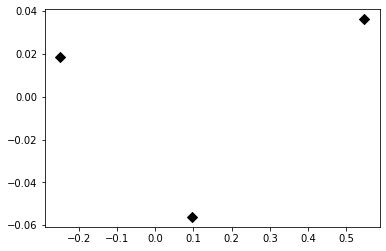

In [41]:
#display the data points and centroids
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='D', s=50, color='k')